# Shocks and Stocks: Analyzing the Impact of Natural Disasters on Financial Markets

Tōhoku Earthquake and Tsunami (March 11, 2011)

And finding how it affecet:

*   Nikkei 225 (Japan)

*   S&P 500 (USA)


**Disaster Information we had**

 *   Disaster Type: Earthquake + Tsunami
 *   Date: 2011-03-11
 *   Location: Japan (primarily affected: Tōhoku region)
 *   Magnitude: 9.0 (Mw) (one of the strongest recorded)
 *   Casualties: 15,000+ deaths, 2,500+ missing
 *   Economic Impact: Estimated $235 billion (costliest disaster in history)



### Gathering stock data

#### Nikkei 225 (Japan)

In [27]:
import yfinance as yf

# Download Nikkei 225 data around the event
nikkei = yf.download('^N225', start='2011-02-01', end='2011-04-30')

# View the first few rows of data
print()
print()
print(nikkei.head())


[*********************100%***********************]  1 of 1 completed



Price              Close          High           Low          Open     Volume
Ticker             ^N225         ^N225         ^N225         ^N225      ^N225
Date                                                                         
2011-02-01  10274.500000  10299.379883  10245.750000  10281.549805  149000000
2011-02-02  10457.360352  10479.750000  10366.959961  10368.480469  180500000
2011-02-03  10431.360352  10450.459961  10409.839844  10424.679688  150700000
2011-02-04  10543.519531  10580.360352  10524.129883  10526.389648  200300000
2011-02-07  10592.040039  10644.209961  10572.719727  10641.299805  162300000


#### S&P 500 (USA)


In [28]:
# Download S&P 500 data around the event
sp500 = yf.download('^GSPC', start='2011-02-01', end='2011-04-30')

# View the first few rows of data
print()
print()
print(sp500.head())


[*********************100%***********************]  1 of 1 completed



Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2011-02-01  1307.589966  1308.859985  1289.140015  1289.140015  5164500000
2011-02-02  1304.030029  1307.609985  1302.619995  1305.910034  4098260000
2011-02-03  1307.099976  1308.599976  1294.829956  1302.770020  4370990000
2011-02-04  1310.869995  1311.000000  1301.670044  1307.010010  3925950000
2011-02-07  1319.050049  1322.849976  1311.849976  1311.849976  3902270000


### Visualizing the Data

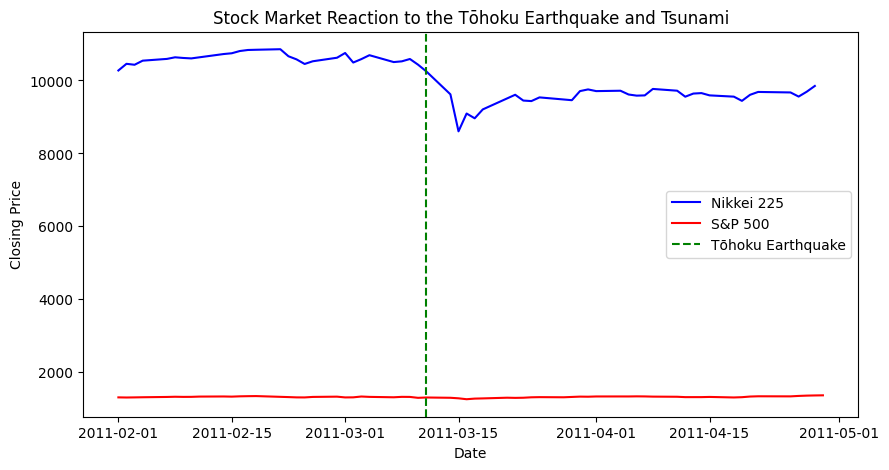

In [51]:
import matplotlib.pyplot as plt
import datetime

# Plot Nikkei 225 and S&P 500 for comparison
plt.figure(figsize=(10, 5))
plt.plot(nikkei['Close'], label='Nikkei 225', color='blue')
plt.plot(sp500['Close'], label='S&P 500', color='red')

# Add labels and title
plt.title('Stock Market Reaction to the Tōhoku Earthquake and Tsunami')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()

# Highlight the date of the disaster
plt.axvline(x=datetime.datetime(2011, 3, 11), color='green', linestyle='--', label='Tōhoku Earthquake')
plt.legend()

# Display the plot
plt.show()


#### Analyzing the Data

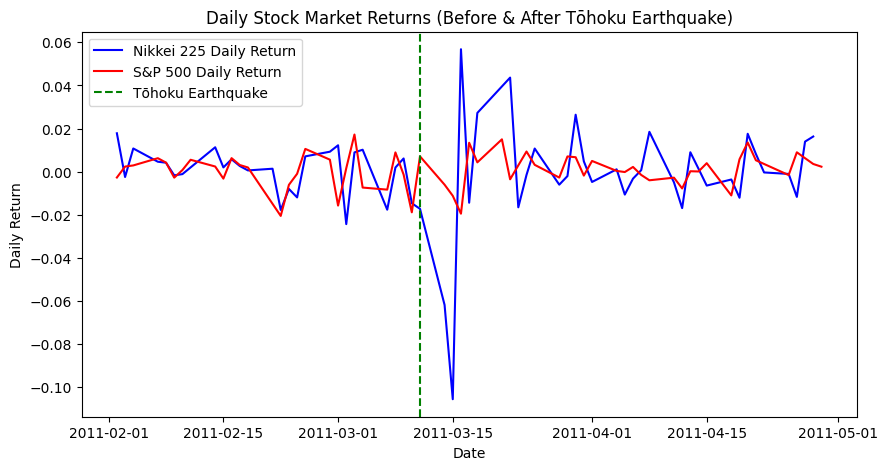

In [52]:
# Calculate daily returns (percentage change)
nikkei['Daily Return'] = nikkei['Close'].pct_change()
sp500['Daily Return'] = sp500['Close'].pct_change()

# Plot daily returns
plt.figure(figsize=(10, 5))
plt.plot(nikkei['Daily Return'], label='Nikkei 225 Daily Return', color='blue')
plt.plot(sp500['Daily Return'], label='S&P 500 Daily Return', color='red')

plt.title('Daily Stock Market Returns (Before & After Tōhoku Earthquake)')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.axvline(x=datetime.datetime(2011, 3, 11), color='green', linestyle='--', label='Tōhoku Earthquake')
plt.legend(loc='upper left')
plt.show()


### Statistical analysis and Its visualization

####Calculations

In [29]:
import datetime

# 1. Define earthquake date
earthquake_date = datetime.datetime(2011, 3, 11)

# 2. Create Daily Returns (if not already created)
nikkei['Daily Return'] = nikkei['Close'].pct_change()
sp500['Daily Return'] = sp500['Close'].pct_change()

# 3. Drop NaN values (very important!)
daily_returns_nikkei = nikkei['Daily Return'].dropna()
daily_returns_sp500 = sp500['Daily Return'].dropna()

# 4. Split into before and after earthquake
nikkei_before = daily_returns_nikkei[daily_returns_nikkei.index < earthquake_date]
nikkei_after = daily_returns_nikkei[daily_returns_nikkei.index >= earthquake_date]

sp500_before = daily_returns_sp500[daily_returns_sp500.index < earthquake_date]
sp500_after = daily_returns_sp500[daily_returns_sp500.index >= earthquake_date]

# 5. Calculate and print statistics
print("\n📊 Nikkei 225 Analysis")
print()
print("- Mean Return Before:", nikkei_before.mean())
print()
print("- Mean Return After:", nikkei_after.mean())
print()
print("- Std Dev Before:", nikkei_before.std())
print()
print("- Std Dev After:", nikkei_after.std())

print("\n📊 S&P 500 Analysis")
print()
print("- Mean Return Before:", sp500_before.mean())
print()
print("- Mean Return After:", sp500_after.mean())
print()
print("- Std Dev Before:", sp500_before.std())
print()
print("- Std Dev After:", sp500_after.std())
print()

#To recheck you have to run Gathering stock data complete cell again once...


📊 Nikkei 225 Analysis

- Mean Return Before: 0.0006480439371899665

- Mean Return After: -0.001322912555630244

- Std Dev Before: 0.010570651384166204

- Std Dev After: 0.027237623882332147

📊 S&P 500 Analysis

- Mean Return Before: -0.00033223609830695087

- Mean Return After: 0.001499354064308684

- Std Dev Before: 0.008700393571477984

- Std Dev After: 0.007269013981551688



####Creating graph on the above's calculations

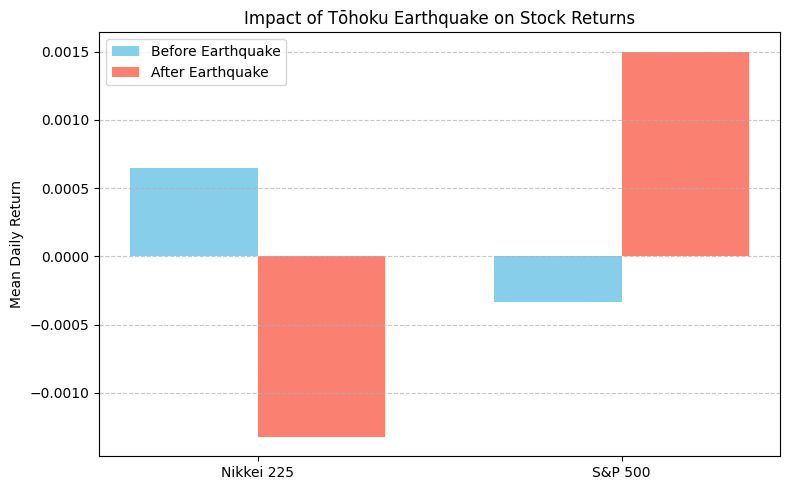

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Prepare the data
indices = ['Nikkei 225', 'S&P 500']
mean_before = [nikkei_before.mean(), sp500_before.mean()]
mean_after = [nikkei_after.mean(), sp500_after.mean()]

x = np.arange(len(indices))  # positions for bars
width = 0.35  # width of the bars

# 2. Create the bar plot
fig, ax = plt.subplots(figsize=(8, 5))

# Bars
bars1 = ax.bar(x - width/2, mean_before, width, label='Before Earthquake', color='skyblue')
bars2 = ax.bar(x + width/2, mean_after, width, label='After Earthquake', color='salmon')

# 3. Labels, Title, Legend
ax.set_ylabel('Mean Daily Return')
ax.set_title('Impact of Tōhoku Earthquake on Stock Returns')
ax.set_xticks(x)
ax.set_xticklabels(indices)
ax.legend()

# 4. Add grid
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# 5. Show plot
plt.tight_layout()
plt.show()


####**T-Test**

Was the impact was significant

perform a two-sample independent t-test:

In [31]:
from scipy.stats import ttest_ind

# Perform t-test for Nikkei
t_stat_nikkei, p_val_nikkei = ttest_ind(nikkei_before, nikkei_after, equal_var=False)

# Perform t-test for S&P 500
t_stat_sp500, p_val_sp500 = ttest_ind(sp500_before, sp500_after, equal_var=False)

# Print results
print("📈 Nikkei 225 T-Test Results")
print("- T-statistic:", t_stat_nikkei)
print("- P-value:", p_val_nikkei)
print()

print("📈 S&P 500 T-Test Results")
print("- T-statistic:", t_stat_sp500)
print("- P-value:", p_val_sp500)


📈 Nikkei 225 T-Test Results
- T-statistic: 0.38566308247358705
- P-value: 0.701564374594599

📈 S&P 500 T-Test Results
- T-statistic: -0.8710911459029076
- P-value: 0.3880285121963819


####**Volatility** (Standard Deviation) Comparison Plot

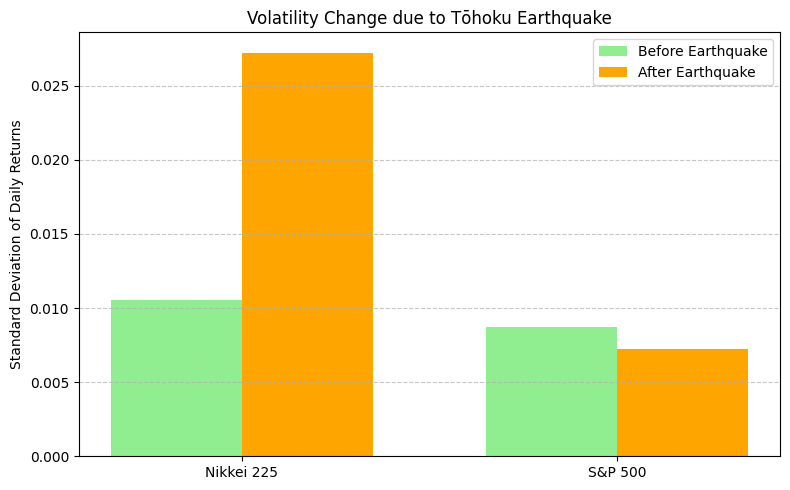

In [32]:
# Prepare the data
volatility_before = [nikkei_before.std(), sp500_before.std()]
volatility_after = [nikkei_after.std(), sp500_after.std()]

x = np.arange(len(indices))  # positions for bars
width = 0.35

# Create the plot
fig, ax = plt.subplots(figsize=(8, 5))

bars1 = ax.bar(x - width/2, volatility_before, width, label='Before Earthquake', color='lightgreen')
bars2 = ax.bar(x + width/2, volatility_after, width, label='After Earthquake', color='orange')

# Title & rest
ax.set_ylabel('Standard Deviation of Daily Returns')
ax.set_title('Volatility Change due to Tōhoku Earthquake')
ax.set_xticks(x)
ax.set_xticklabels(indices)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

#Adjusting layout
plt.tight_layout()
plt.show()


####Timeline Plot: Stock Index vs Time

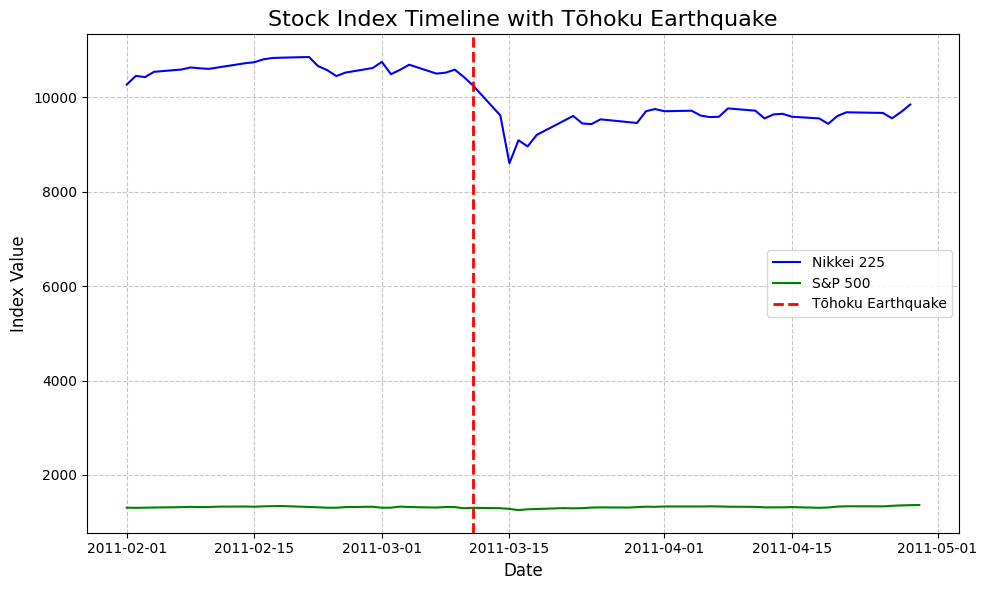

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Plot settings
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting
ax.plot(nikkei['Close'].index, nikkei['Close'], label='Nikkei 225', color='blue')
ax.plot(sp500['Close'].index, sp500['Close'], label='S&P 500', color='green')

# Marking earthquake date
earthquake_date = pd.to_datetime('2011-03-11')
ax.axvline(earthquake_date, color='red', linestyle='--', lw=2, label='Tōhoku Earthquake')

# Tittle and rest
ax.set_title('Stock Index Timeline with Tōhoku Earthquake', fontsize=16)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Index Value', fontsize=12)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
